In [1]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib widget 
import py4DSTEM
import glob
import dask.array as da
import gc

In [2]:
simulated = np.load(r"C:\Users\tas72\Documents\PhD\pbi2.npy",allow_pickle = True)
experimental = np.load(r'C:\Users\tas72\Documents\PhD\dg606\py4DSTEM_analysis\20221202_183724/complete_adj_matrix.npy',allow_pickle = True)
experimental = experimental[:256,:256]

In [3]:
assignment = np.zeros((np.shape(experimental)[0],np.shape(experimental)[1]))
for i in range(np.shape(experimental)[0]):
    print(i)
    for j in range(np.shape(experimental)[1]):
        e_oi = experimental[i,j]
        shape_eoi = np.shape(e_oi)

        difference = []
        for k in range(len(simulated)):
            s_oi = simulated[k]
            s_oi_cropped = s_oi[:np.shape(e_oi)[0],:np.shape(e_oi)[1]]
            e_oi_cropped = e_oi[:np.shape(s_oi)[0],:np.shape(s_oi)[1]]
            difference.append(np.sum(np.abs(e_oi_cropped-s_oi_cropped)))
        assignment[i,j] = np.argmin(difference)
        

0



KeyboardInterrupt



In [135]:
fig,ax = plt.subplots()
ax.imshow(assignment,cmap = 'magma')
ax.set_xticks([])
ax.set_yticks([])

[]

In [60]:
np.save('assignment.npy',assignment )

In [4]:
assignment = np.load('assignment.npy')

In [5]:
sdi = np.load(r"D:\dg606\SED\Centered_and_aff_trans\20221202_183724_spi.npy")

Can also cluster the patterns based on their simularity

In [83]:
assigned_clusters_fp = np.zeros((np.shape(experimental)[0],np.shape(experimental)[1]),dtype = 'int64') # first pass- need 2 passes otherwise you are more likely to find a later number the later you go
clusters = []
for i in range((np.shape(experimental)[0])):
    print(i, end = ' ')
    print(len(clusters))
    for j in range((np.shape(experimental)[1])):
            poi = experimental[i,j]
            
            if (i == 0) & (j==0):
                clusters.append(poi)
            
            
            cropped_poi = poi[:6,:6]
            difference = []

            for k in range(len(clusters)):
                cluster_oi = clusters[k][:6,:6]
                cropped_poi = cropped_poi[:np.shape(cluster_oi)[0],:np.shape(cluster_oi)[1]]
                cluster_oi = cluster_oi[:np.shape(cropped_poi)[0],:np.shape(cropped_poi)[1]]
                difference.append(np.sum(np.abs(cropped_poi-cluster_oi)))
            
            min_arg = np.argmin(difference)
            min_diff = difference[min_arg]
            if min_diff < 0.5:
                assigned_clusters_fp[i,j] = np.argmin(difference)
               
            else:
                clusters.append(poi)
                assigned_clusters_fp[i,j] = len(clusters)

            

0 0
1 141
2 150
3 153
4 155
5 155
6 155
7 155
8 155
9 155
10 155
11 156
12 156
13 156
14 157
15 158
16 159
17 160
18 160
19 161
20 161
21 161
22 162
23 162
24 162
25 162
26 162
27 162
28 162
29 163
30 164
31 164
32 164
33 164
34 164
35 164
36 164
37 164
38 164
39 164
40 164
41 164
42 164
43 164
44 164
45 164
46 164
47 164
48 164
49 164
50 164
51 165
52 165
53 165
54 165
55 166
56 166
57 166
58 166
59 166
60 166
61 166
62 166
63 166
64 166
65 166
66 166
67 166
68 166
69 166
70 166
71 166
72 166
73 166
74 166
75 166
76 166
77 166
78 166
79 166
80 166
81 166
82 166
83 166
84 166
85 166
86 166
87 166
88 166
89 166
90 166
91 167
92 167
93 167
94 169
95 169
96 169
97 169
98 170
99 170
100 170
101 170
102 170
103 170
104 170
105 170
106 170
107 171
108 171
109 171
110 171
111 171
112 171
113 171
114 171
115 171
116 171
117 171
118 171
119 171
120 171
121 171
122 171
123 171
124 171
125 171
126 171
127 171
128 171
129 171
130 171
131 171
132 171
133 171
134 171
135 171
136 171
137 171
138 171


In [84]:
assigned_clusters_sp = np.zeros((np.shape(experimental)[0],np.shape(experimental)[1]),dtype = 'int64')

for i in range(np.shape(experimental)[0]):
    print(i, end = ' ')
    for j in range(np.shape(experimental)[1]):
        poi = experimental[i,j]
        cropped_poi = poi[:6,:6]
        difference = []
        for k in range(len(clusters)):
            cluster_oi = clusters[k][:6,:6]
            cropped_poi = cropped_poi[:np.shape(cluster_oi)[0],:np.shape(cluster_oi)[1]]
            cluster_oi = cluster_oi[:np.shape(cropped_poi)[0],:np.shape(cropped_poi)[1]]
            difference.append(np.sum(np.abs(cropped_poi-cluster_oi)))
        min_arg = np.argmin(difference)
        assigned_clusters_sp[i,j] = np.argmin(difference)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 

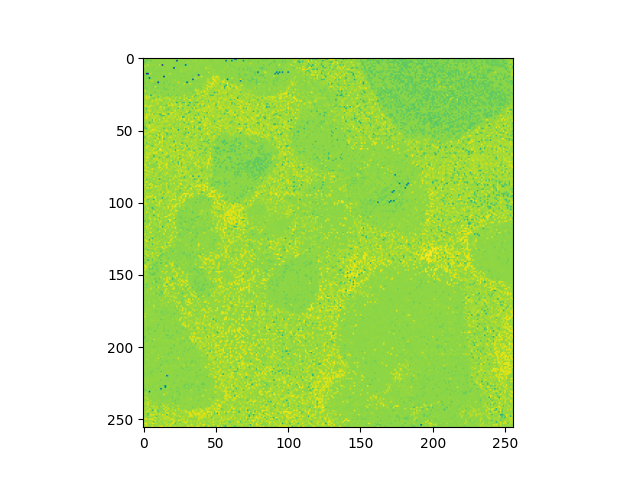

In [85]:
fig,ax = plt.subplots()
ax.imshow(assigned_clusters_sp)

In [86]:
s = hs.load(r"D:\dg606\SED\Centered_and_aff_trans\20221202_183724.hdf5",lazy=True)

In [87]:
## Import calibration
with open(r"C:\Users\tas72\Documents\PhD\dg606\real_space_calib.json") as user_file:
    real_cal = user_file.read()
   
    real_cal = float(real_cal[15:-1])
with open(r"C:\Users\tas72\Documents\PhD\dg606\recip_space_calib.json") as user_file:
    recip_cal = user_file.read()
    recip_cal = float(recip_cal[16:-1])
    
s.axes_manager[0].scale = real_cal
s.axes_manager[0].units = 'm'
s.axes_manager[1].scale = real_cal
s.axes_manager[1].units = 'm'
s.axes_manager[2].scale = recip_cal
s.axes_manager[2].units = 'A^-1'
s.axes_manager[3].scale = recip_cal
s.axes_manager[3].units = 'A^-1'

In [88]:
cropped = s.inav[:256,:256] 

In [89]:
cropped.compute()

[########################################] | 100% Completed | 178.97 s


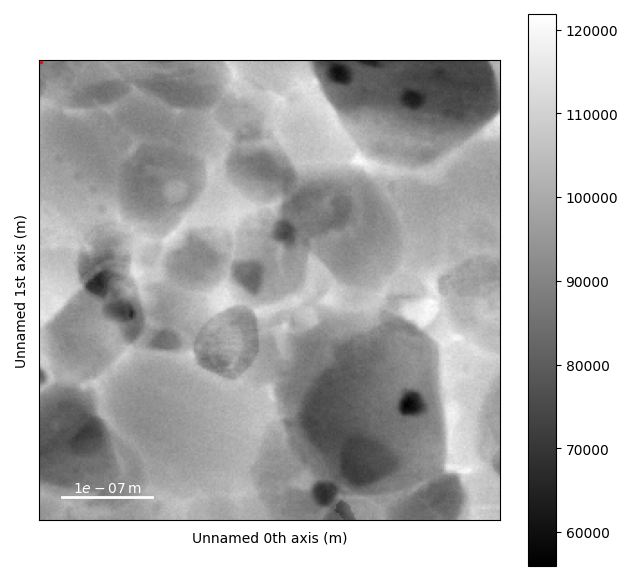

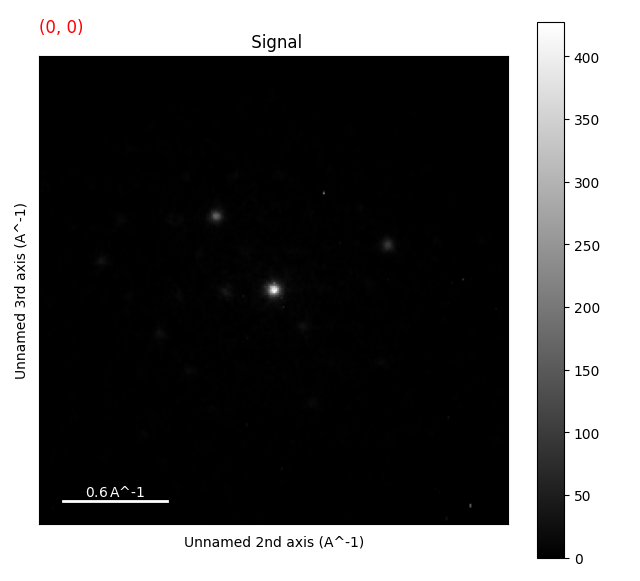

In [48]:
cropped.plot()

In [90]:
clustered_coords = [[] for x in range(len(clusters))]
for i in range(np.shape(experimental)[0]):
    print(i,end =' ')
    for j in range(np.shape(experimental)[1]):
        cluster_oi = assigned_clusters_sp[i,j]
        current_clustered_dps = clustered_coords[cluster_oi]
        current_clustered_dps.append((i,j))
        clustered_coords[cluster_oi] = current_clustered_dps

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 

Now we have a list of the diffraction patterns clustered together pick a certian number of these at random index them with ACOM take the phase which is the most common

In [91]:
py4DSTEM.io.print_h5_tree(r"C:\Users\tas72\Documents\PhD\dg606\py4DSTEM_analysis\20221202_183724\braggdisks_mcc.h5", 
)

/
|--4DSTEM
	|--braggvectors_copy
		|--_v_cal
		|--_v_uncal
		|--calibration




In [92]:
# Load the crystal structure
fapbi3_crystal = py4DSTEM.process.diffraction.Crystal.from_CIF(r"C:\Users\tas72\Documents\PhD\dg606\91K_fapbi3.cif")
pbi2_crystal = py4DSTEM.process.diffraction.Crystal.from_CIF(r"C:\Users\tas72\Documents\PhD\dg606\pbi2_2h.cif")

# Calculate and plot structure factors
k_max = 1.5

fapbi3_crystal.calculate_structure_factors(
    k_max,
)
pbi2_crystal.calculate_structure_factors(
    k_max,
)

C:\Users\tas72\.conda\envs\py4D_pyxem\lib\site-packages\pymatgen\io\cif.py:1169: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [100]:
fapbi3_crystal.orientation_plan(
    zone_axis_range = 'full',
    angle_step_zone_axis = 1,
    angle_coarse_zone_axis = 1.0,
    angle_refine_range = 1.0,
    #
    angle_step_in_plane = 2,
    accel_voltage = 200e3,
    CUDA=False,
#     intensity_power = 0.5,
#     intensity_power = 0.125,
#     radial_power = 0.0,
#     corr_kernel_size = 0.16,
#     tol_peak_delete = 0.02,
)

pbi2_crystal.orientation_plan(
    zone_axis_range = 'full',
    angle_step_zone_axis = 1,
    angle_coarse_zone_axis = 1.0,
    angle_refine_range = 1.0,
    #
    angle_step_in_plane = 2,
    accel_voltage = 200e3,
    CUDA=False,
#     intensity_power = 0.5,
#     intensity_power = 0.125,
#     radial_power = 0.0,
#     corr_kernel_size = 0.16,
#     tol_peak_delete = 0.02,
)





Orientation plan: 100%|█████████████████████████████████████████████████| 16381/16381 [00:50<00:00, 321.77 zone axes/s]


In [ ]:
bragg_peaks = py4DSTEM.read(
    r"C:\Users\tas72\Documents\PhD\dg606\py4DSTEM_analysis\20221202_183724\braggdisks_mcc.h5", 
    root = r'/4DSTEM/braggvectors_copy'
)

In [101]:
len(clusters)

172

In [ ]:
n_dps = 10 # Max number of dps to check
i=0
assigned_phase = [] #0 = Pbi2 1 = fapbi3
for cluster in clustered_coords:
    print('#######')
    print(i)
    print('#######')
    len_cluster = len(cluster)
    rn = np.random.randint(len_cluster,size = n_dps)
    unique_rns = np.unique(rn) # put this in so it won't repeact measurements if not assigned to the correct phase
    
    for j in range(len(unique_rns)): # go through the randomly found dps then use ACOM to assign the phase- use the most common
        assigned_phases = []
        coords = cluster[unique_rns[j]]
        xind, yind = coords[0], coords[1]
        
        
        orientation_fapbi3  = fapbi3_crystal.match_single_pattern(
        bragg_peaks.vectors[xind,yind],
        num_matches_return = 1,
        plot_corr = False,
        plot_polar = False,
        verbose = True,
        )
        
        orientation_PbI2  = pbi2_crystal.match_single_pattern(
            bragg_peaks.vectors[xind,yind],
            num_matches_return = 1,
            plot_corr = False,
            plot_polar = False,
            verbose = True,
        )
        if orientation_fapbi3.corr[0] > orientation_PbI2.corr[0]:
            assigned_phases.append(1)
        else:
            assigned_phases.append(0)
            
   
    assigned_phase.append(max(set(assigned_phases), key=lst.count))
    i+=1     
                    

#######
0
#######
Best fit lattice directions: z axis = ([0.088 0.1   0.991]), x axis = ([0.963 0.219 0.156]), with corr value = 0.09
Best fit lattice directions: z axis = ([ 0.185  0.286 -0.47   0.009]), x axis = ([ 0.433 -0.068 -0.365  0.523]), with corr value = 0.052
#######
1
#######
Best fit lattice directions: z axis = ([0.018 0.997 0.075]), x axis = ([0.902 0.    0.432]), with corr value = 0.486
Best fit lattice directions: z axis = ([-0.285 -0.185  0.47   0.   ]), x axis = ([ 0.032  0.207 -0.238  0.854]), with corr value = 0.653
#######
2
#######
Best fit lattice directions: z axis = ([0.051 0.726 0.686]), x axis = ([0.432 0.137 0.892]), with corr value = 0.347
Best fit lattice directions: z axis = ([ 0.005  0.066 -0.071  0.988]), x axis = ([ 0.093  0.369 -0.462  0.01 ]), with corr value = 0.665
#######
3
#######
Best fit lattice directions: z axis = ([-0.     0.995  0.098]), x axis = ([0.92  0.019 0.392]), with corr value = 0.405
Best fit lattice directions: z axis = ([ 0.005 

In [110]:
[print(i,assigned_phase[i] == 1) for i in range(len(assigned_clusters_sp))]

0 True
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 True
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 True
45 False
46 False
47 False
48 False
49 False
50 True
51 False
52 False
53 True
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False


IndexError: list index out of range

In [112]:
np.where(assigned_clusters_sp == 50)

(array([  0, 220], dtype=int64), array([50, 16], dtype=int64))